# Ex - 

### Introduction:
This Dataset is Chipotle Dataset and on which EDA and Data Visualization has been done.

### Step 1. Import the necessary libraries

In [0]:
import numpy as np
import pandas as pd

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv). 

### Step 3. Assign it to a variable called 

In [53]:
df = pd.read_csv("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv", sep = '\t')
df.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
order_id              4622 non-null int64
quantity              4622 non-null int64
item_name             4622 non-null object
choice_description    3376 non-null object
item_price            4622 non-null object
dtypes: int64(2), object(3)
memory usage: 180.6+ KB


In [55]:
df.describe(include ='all')

,order_id,quantity,item_name,choice_description,item_price
count,4622.000000,4622.000000,4622,3376,4622
unique,NaN,NaN,50,1043,78
top,NaN,NaN,Chicken Bowl,[Diet Coke],$8.75
freq,NaN,NaN,726,134,730
mean,927.254868,1.075725,NaN,NaN,NaN
std,528.890796,0.410186,NaN,NaN,NaN
min,1.000000,1.000000,NaN,NaN,NaN
25%,477.250000,1.000000,NaN,NaN,NaN
50%,926.000000,1.000000,NaN,NaN,NaN
75%,1393.000000,1.000000,NaN,NaN,NaN


#### Missing values have been handled by taking Mode of Column.

In [0]:
df['choice_description'].fillna(df['choice_description'].mode()[0], inplace = True)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
order_id              4622 non-null int64
quantity              4622 non-null int64
item_name             4622 non-null object
choice_description    4622 non-null object
item_price            4622 non-null object
dtypes: int64(2), object(3)
memory usage: 180.6+ KB


#### Item_price is actually is dollars "$" but for doing EDA, Item_price column have been converted into float type column.

In [0]:
df['item_price'] = df['item_price'].str.replace('$', '').astype(float)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
order_id              4622 non-null int64
quantity              4622 non-null int64
item_name             4622 non-null object
choice_description    4622 non-null object
item_price            4622 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 180.6+ KB


#### **EDA & DATA VISUALIZATION**

In [70]:
df['Revenue'] = df['quantity'] * df['item_price']
df.head()

,order_id,quantity,item_name,choice_description,item_price,Revenue
0,1,1,Chips and Fresh Tomato Salsa,[Diet Coke],2.39,2.39
1,1,1,Izze,[Clementine],3.39,3.39
2,1,1,Nantucket Nectar,[Apple],3.39,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,[Diet Coke],2.39,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,33.96


In [110]:
df['item_name'].unique()

array(['Chips and Fresh Tomato Salsa', 'Izze', 'Nantucket Nectar',
       'Chips and Tomatillo-Green Chili Salsa', 'Chicken Bowl',
       'Side of Chips', 'Steak Burrito', 'Steak Soft Tacos',
       'Chips and Guacamole', 'Chicken Crispy Tacos',
       'Chicken Soft Tacos', 'Chicken Burrito', 'Canned Soda',
       'Barbacoa Burrito', 'Carnitas Burrito', 'Carnitas Bowl',
       'Bottled Water', 'Chips and Tomatillo Green Chili Salsa',
       'Barbacoa Bowl', 'Chips', 'Chicken Salad Bowl', 'Steak Bowl',
       'Barbacoa Soft Tacos', 'Veggie Burrito', 'Veggie Bowl',
       'Steak Crispy Tacos', 'Chips and Tomatillo Red Chili Salsa',
       'Barbacoa Crispy Tacos', 'Veggie Salad Bowl',
       'Chips and Roasted Chili-Corn Salsa',
       'Chips and Roasted Chili Corn Salsa', 'Carnitas Soft Tacos',
       'Chicken Salad', 'Canned Soft Drink', 'Steak Salad Bowl',
       '6 Pack Soft Drink', 'Chips and Tomatillo-Red Chili Salsa', 'Bowl',
       'Burrito', 'Crispy Tacos', 'Carnitas Crispy Tacos

In [81]:
df.groupby(['item_name'])['Revenue'].mean().sort_values(ascending = False)[:10]

item_name
Bowl                     37.000000
Carnitas Crispy Tacos    13.705714
Chicken Salad Bowl       13.693182
Steak Salad Bowl         13.487931
Veggie Soft Tacos        12.991429
Barbacoa Crispy Tacos    12.610000
Carnitas Bowl            12.216324
Steak Bowl               11.752654
Chicken Burrito          11.549837
Steak Burrito            11.511223
Name: Revenue, dtype: float64

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

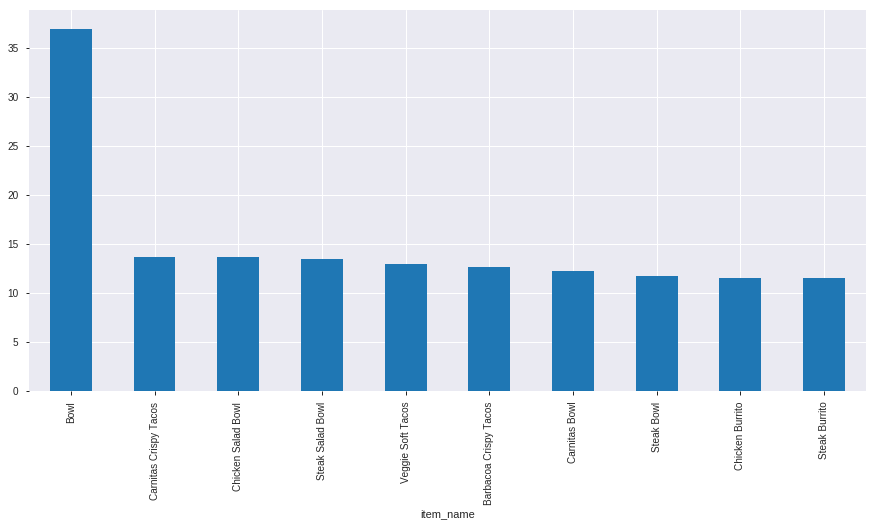

In [87]:
df.groupby(['item_name'])['Revenue'].mean().sort_values(ascending = False)[:10].plot(kind= 'bar', figsize = (15,7))

In [88]:
df.groupby(['item_name'])['item_price'].mean().sort_values(ascending = False)[:10]

item_name
Bowl                     14.800000
Steak Salad Bowl         11.847931
Chicken Salad Bowl       11.170455
Carnitas Crispy Tacos    11.137143
Carnitas Salad Bowl      11.056667
Barbacoa Crispy Tacos    10.928182
Carnitas Bowl            10.833971
Steak Bowl               10.711801
Barbacoa Salad Bowl      10.640000
Veggie Soft Tacos        10.565714
Name: item_price, dtype: float64

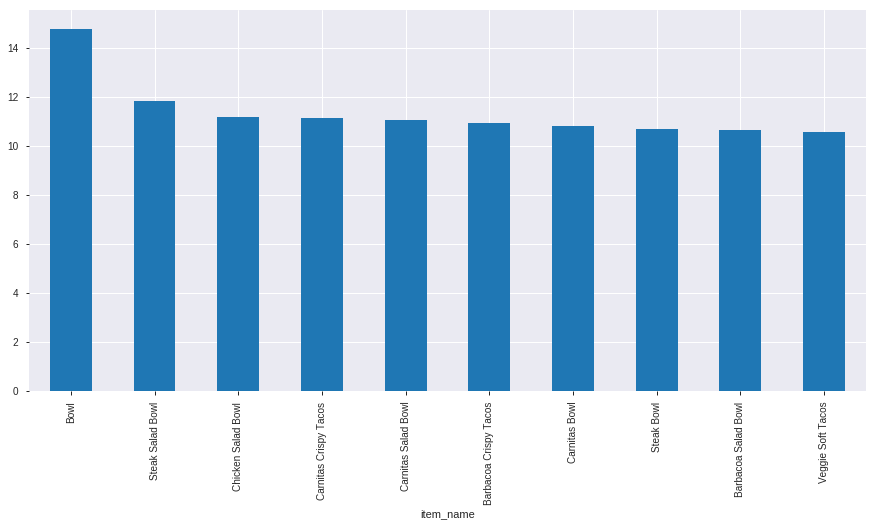

In [89]:
df.groupby(['item_name'])['item_price'].mean().sort_values(ascending = False)[:10].plot(kind= 'bar', figsize = (15,7))

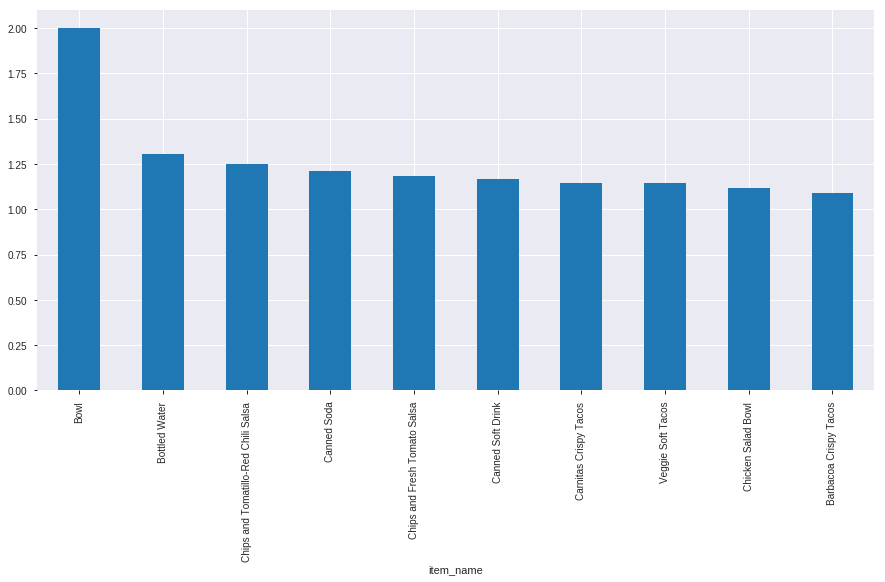

In [91]:
df.groupby(['item_name'])['quantity'].mean().sort_values(ascending = False)[:10].plot(kind= 'bar', figsize = (15,7))

In [100]:
df.groupby(['order_id'])['item_price'].mean().sort_values(ascending = False)[:10]

order_id
1398    35.250000
178     32.940000
616     26.250000
1336    26.070000
123     23.780000
253     23.780000
1502    23.500000
1443    22.962857
1175    22.960000
459     22.500000
Name: item_price, dtype: float64

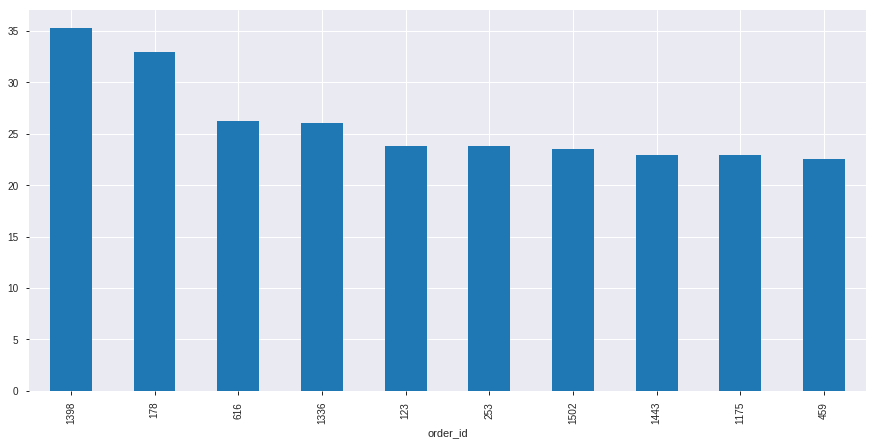

In [99]:
df.groupby(['order_id'])['item_price'].mean().sort_values(ascending = False)[:10].plot(kind= 'bar', figsize = (15,7))

In [103]:
df.groupby(['order_id'])['Revenue'].mean().sort_values(ascending = False)[:10]

order_id
1443    153.462857
1398    105.750000
178      98.820000
616      78.750000
1336     78.210000
193      66.600000
1559     49.200000
123      47.560000
253      47.560000
1502     47.000000
Name: Revenue, dtype: float64

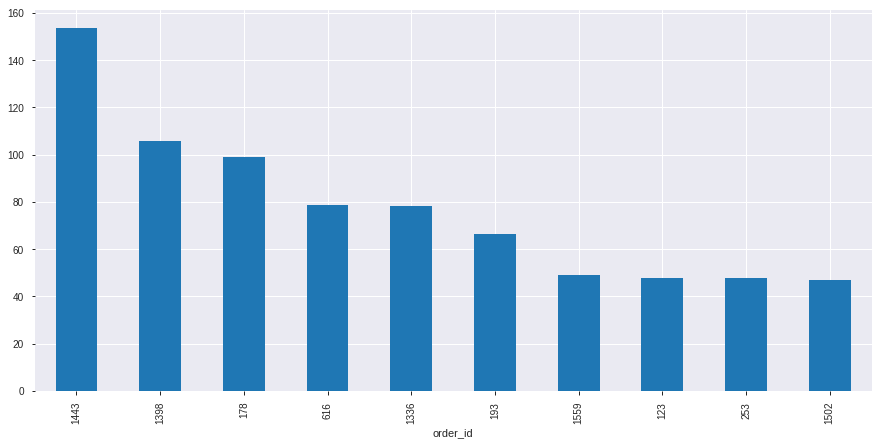

In [104]:
df.groupby(['order_id'])['Revenue'].mean().sort_values(ascending = False)[:10].plot(kind= 'bar', figsize = (15,7))

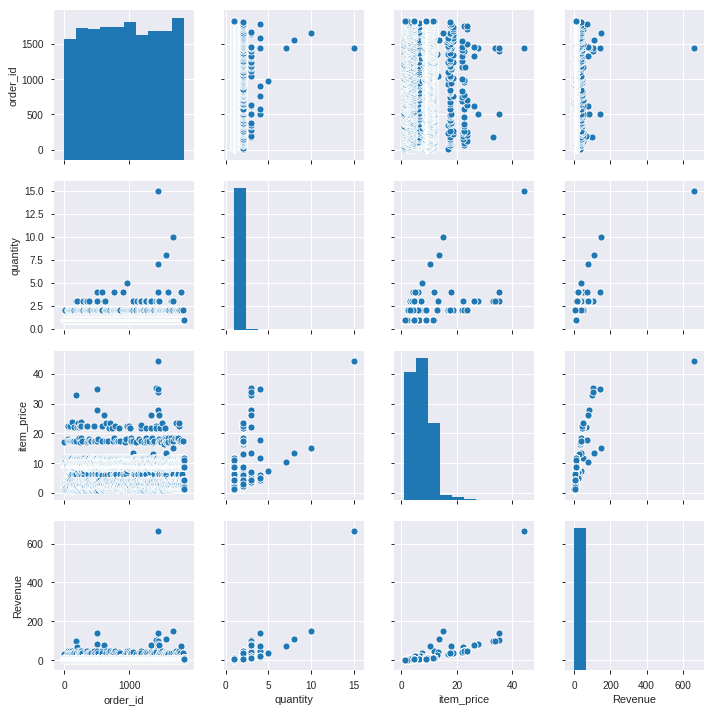

In [90]:
sns.pairplot(df)

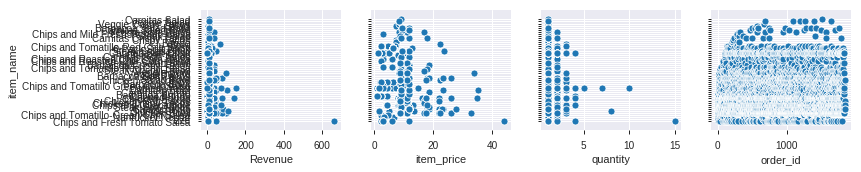

In [111]:
sns.pairplot(df, y_vars= 'item_name', x_vars= ['Revenue', 'item_price', 'quantity', 'order_id'])